In [15]:
#simpson공식을 이용한 수치적분함수 생성

In [31]:
simpson_n <- function(ftn, a, b, n = 100) {
  n <- max(c(2*(n %/% 2), 4))
  h <- (b-a)/n
  x.vec1 <- seq(a+h, b-h, by = 2*h)
  x.vec2 <- seq(a+2*h, b-2*h, by = 2*h)
  f.vec1 <- sapply(x.vec1, ftn)
  f.vec2 <- sapply(x.vec2, ftn)
  h/3*(ftn(a) + ftn(b) + 4*sum(f.vec1) + 2*sum(f.vec2)) # return value
}

In [32]:
#f라는 임의의 수치적분 할 함수 생성

In [33]:
c <- 1/simpson_n(function(x) exp(-x^3), 0, 1, n=1000)
f <- function(x) {
  if (0 <= x & x <= 1) c*exp(-x^3)
  else 0
}

In [34]:
#f의 cdf를 구하기 위한 Fx라는 cdf구하는 함수 생성

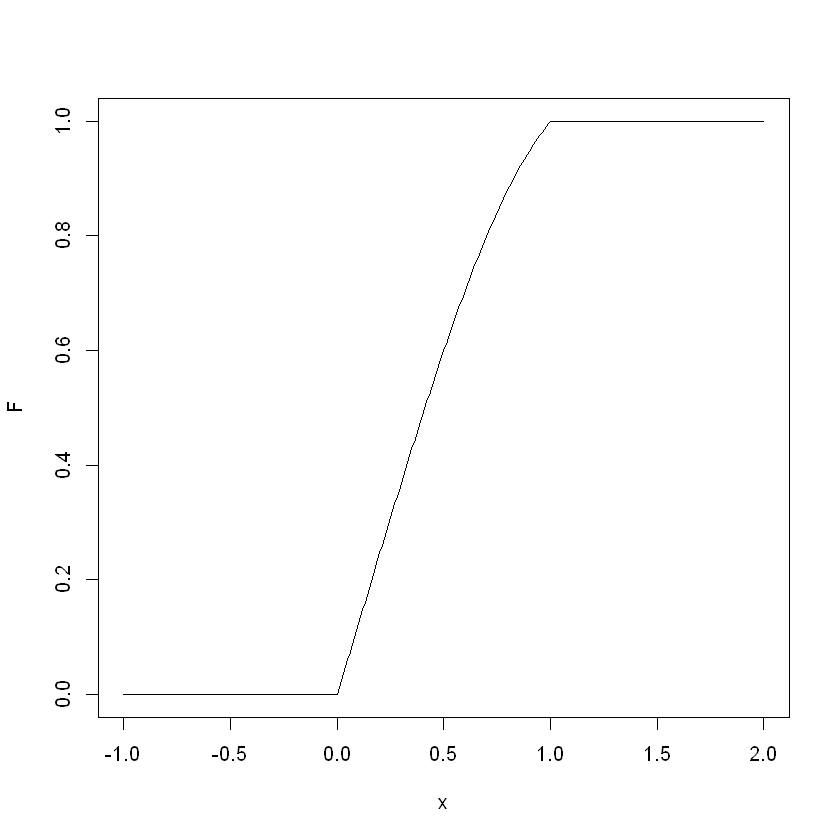

In [35]:
Fx<-function(x){
  if(0 <= x & x <= 1) {
    return(simpson_n(f,0,x))
  }else if(x<0){
    return(0)
  }else{
    return(1)
  }
}
x<-seq(-1,2,0.01)

plot(x,sapply(x,Fx),type="l", ylab="F")

In [36]:
#역함수를 구하는 함수 생성하고 qx라는 객체에 할당

In [37]:
inverse <- function (f, lower = 0, upper = 1) {
function (y) uniroot((function (x) f(x) - y), lower = lower, upper = upper)[[1]]
}
qx <- inverse(Fx)

In [38]:
#Fx의 역함수 중 0~1인 부분만 떼어옴

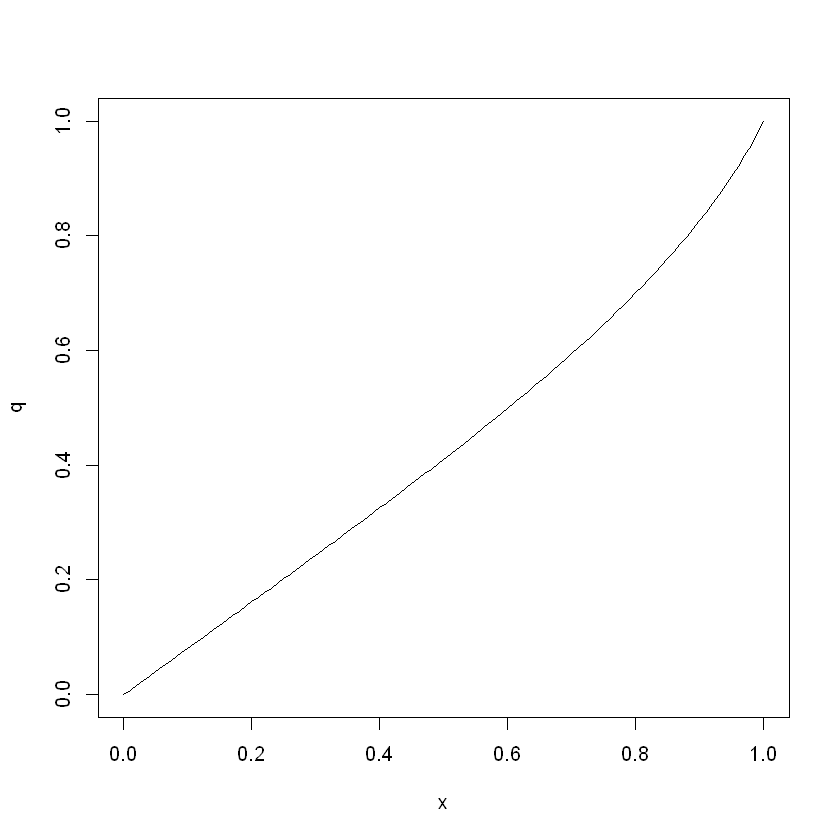

In [39]:
y <- seq(0,1,0.01)
plot(y, sapply(y, qx), type = 'l', ylab="q", xlab="x")

In [40]:
#qx에 uniform R.V를 적용한 histogram과 본래 f의 pdf를 비교

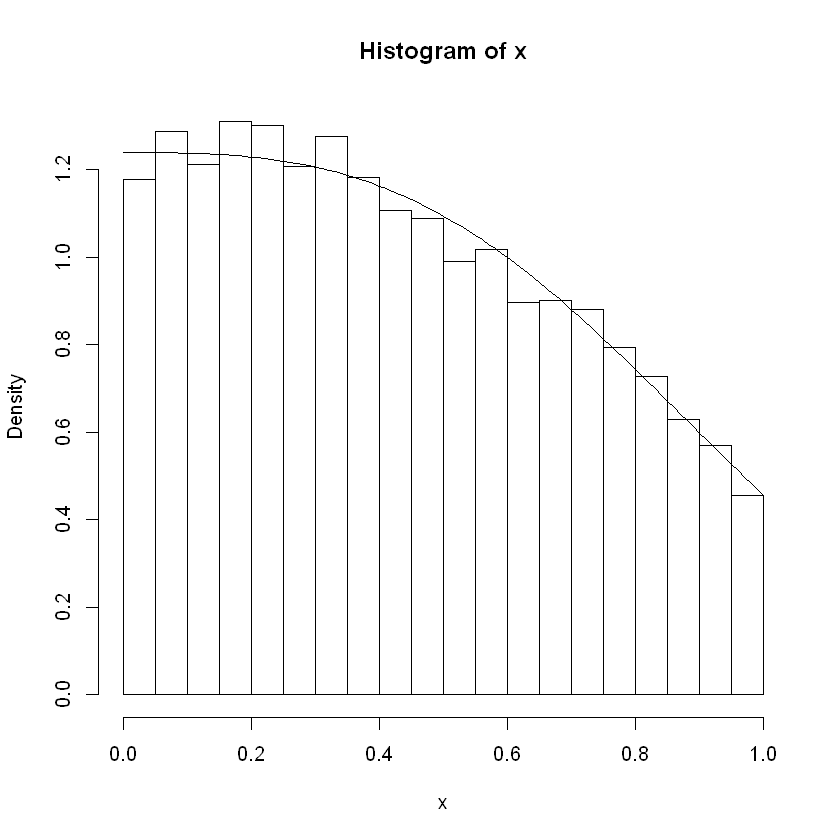

In [41]:
koo<-c()
for(i in 1:10000){
  koo[i]<-qx(runif(1))
}
hist(koo,probability = T,xlab="x",main="Histogram of x")
lines(seq(0,1,0.01),sapply(seq(0,1,0.01),f))

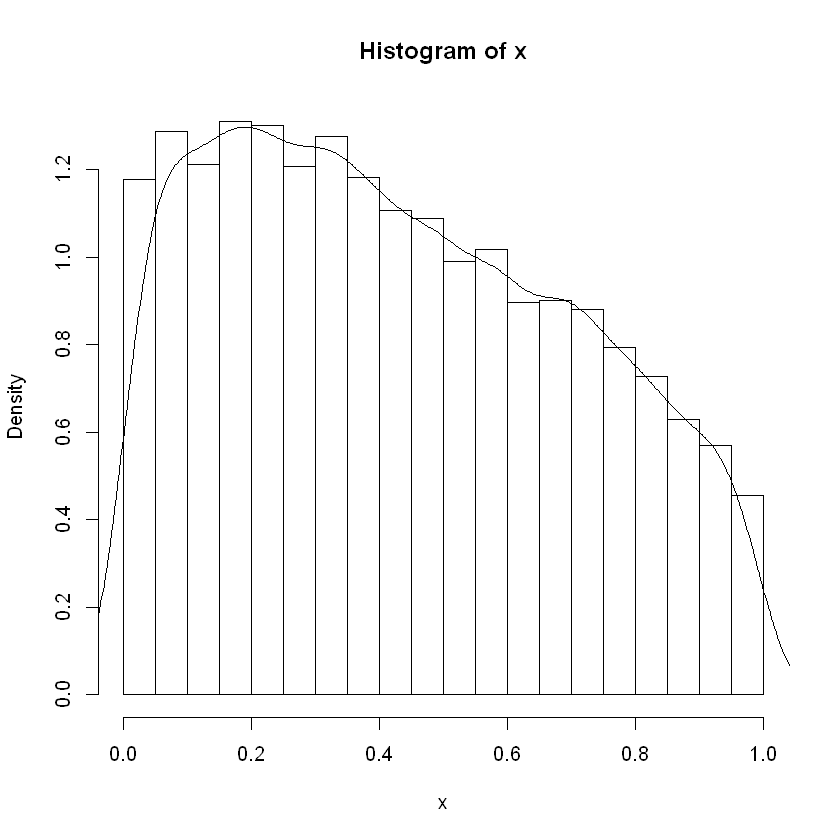

In [42]:
hist(koo,probability = T,xlab="x",main="Histogram of x")
lines(density(koo))